In [17]:
import numpy as np

In [18]:
y = np.array([1,2,3,4,0,0,0,7])
y

array([1, 2, 3, 4, 0, 0, 0, 7])

In [19]:
group1 = 0

In [20]:
y==group1

array([False, False, False, False,  True,  True,  True, False])

In [21]:
newY = y.copy()
newY[y!=group1] = -1
newY[y==group1] = 1
newY

array([-1, -1, -1, -1,  1,  1,  1, -1])

In [22]:
y2 = y.reshape(1,8)
print(y2)
print(y)

[[1 2 3 4 0 0 0 7]]
[1 2 3 4 0 0 0 7]


In [23]:
a1 = np.array([[1],[2],[3]])
a2 = np.array(([1,2,3],[2,3,4],[3,4,5]))
a1 * a2

array([[ 1,  2,  3],
       [ 4,  6,  8],
       [ 9, 12, 15]])

In [24]:
a1 = np.array([[1],[2],[3]])
print(a1)
print(a2)
print(a1 * a2)

[[1]
 [2]
 [3]]
[[1 2 3]
 [2 3 4]
 [3 4 5]]
[[ 1  2  3]
 [ 4  6  8]
 [ 9 12 15]]


In [25]:
a = {}
a["0"] = 5
a["1"] = 4
a

{'0': 5, '1': 4}

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
def loadFile(fname):
    y = []
    x = []
    with open(fname) as f:
        for line in f:
            myInput = list(map(float, line.split()))
            y.append(int(myInput[0]))
            x.append(myInput[1:])
    return np.array(x), np.array(y)

In [28]:
def modifyY(Y, group1):
    newY = Y.copy()
    newY[Y != group1] = -1
    newY[Y == group1] = 1

    return newY

In [83]:
def modifyY_1v1(X, Y, group1, group2):
    h1 = Y != group1
    h2 = Y != group2
    h3 = np.logical_and(h1, h2)
    #print(h3)
    Y2 = np.delete(Y, np.where(h3))
    X2 = np.delete(X, np.where(h3), axis=0)
    Y3 = modifyY(Y2, group1)
    return X2, Y3

x, y1 = loadFile("./test_feature.txt")
x2, y2 = modifyY_1v1(x, y1, 3, 6)
print(y1)
print(y2)
print(x)
print(x2)

[9 6 3 6 6 0 0 0 6 9]
[-1  1 -1 -1 -1]
[[ 0.27217773 -4.8479375 ]
 [ 0.26513281 -5.102     ]
 [ 0.33592578 -2.9215625 ]
 [ 0.26484961 -4.156625  ]
 [ 0.34533789 -6.7184375 ]
 [ 0.35238477 -3.8115    ]
 [ 0.32790625 -2.326875  ]
 [ 0.35039453 -2.537     ]
 [ 0.32275781 -5.423125  ]
 [ 0.18936133 -3.1240625 ]]
[[ 0.26513281 -5.102     ]
 [ 0.33592578 -2.9215625 ]
 [ 0.26484961 -4.156625  ]
 [ 0.34533789 -6.7184375 ]
 [ 0.32275781 -5.423125  ]]


In [30]:

x, y1 = loadFile("./test_feature.txt")
h1 = y1 != 3
h2 = y1 !=6
h3 = np.logical_and(h1, h2)
print(y1)
print(h1)
print(h2)
print(h3)

[9 6 3 6 6 0 0 0 6 9]
[ True  True False  True  True  True  True  True  True  True]
[ True False  True False False  True  True  True False  True]
[ True False False False False  True  True  True False  True]


In [31]:
X, Y1 = loadFile("./features.train.txt")
len(Y1)
Y1[:20]

array([6, 5, 4, 7, 3, 6, 3, 1, 0, 1, 7, 0, 1, 1, 7, 7, 4, 8, 0, 1])

In [74]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [33]:
def buildDF(myList, data1, data2, data3=None):
    if data3 == None:
        d = {'Ein': data1, 'num of support vectors': data2}
    else:
        d = {'Ein': data1, 'num of support vectors': data2, "Eout": data3}
    df = pd.DataFrame(data=d, index = myList)
    return df

In [93]:
?cross_val_score


In [94]:
def testEin_1v1_CV_better():
    X, Y1 = loadFile("./features.train.txt")
    testX, testY = loadFile("./features.test.txt")
    
    CList = [0.0001, 0.001, 0.01, 0.1, 1]
    
    group1 = 1
    group2 = 5
    X2, Y2 = modifyY_1v1(X, Y1, group1, group2)
    
    whichC = []
    for iter in range(5):
        score_all = []
        for c in CList:
            #cv = KFold(n_splits=10, random_state=iter, shuffle=True)
            cv = KFold(n_splits=10, shuffle=True)
            svclassifier = SVC(kernel='poly', degree=2, C=c, random_state = iter, gamma='auto')
            #svclassifier.fit(X2, Y2)
            scores = cross_val_score(svclassifier, X2, Y2, scoring = 'accuracy', cv=cv, n_jobs=-1)
            mean_score = np.mean(scores)
            score_all.append(mean_score)
        print(score_all)
        whichC.append(CList[np.argmax(score_all)])
    
    return whichC

[0.9756614404703576, 0.9923117752735587, 0.995516903478687, 0.9948758778376614, 0.9948717948717949]
[0.9756532745386247, 0.9929528009145845, 0.9955128205128206, 0.9955128205128204, 0.9961620120855791]
[0.9756491915727583, 0.9923117752735585, 0.9955209864445532, 0.9955128205128204, 0.9948758778376613]
[0.9756491915727585, 0.9929609668463172, 0.9955128205128204, 0.995516903478687, 0.9961538461538464]
[0.9756491915727585, 0.9916666666666668, 0.9955209864445533, 0.9955209864445533, 0.9955209864445533]
[0.01, 1, 0.01, 1, 0.01]


(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
        0.901, 1.   ]),
 <a list of 10 Patch objects>)

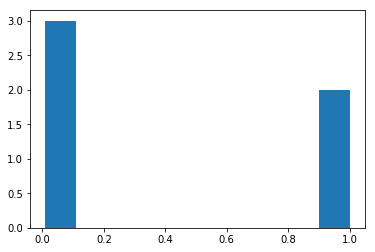

In [95]:
whichC = testEin_1v1_CV_better()
print(whichC)
plt.hist(whichC)

In [72]:
def testEin_1v1_CV():
    X, Y1 = loadFile("./features.train.txt")
    testX, testY = loadFile("./features.test.txt")
    #groups = [0, 2, 4, 6, 8]
    groups = [0]
    Ein_All = []
    Eout_All = []
    svc_num = []
    CList = [0.0001, 0.001, 0.01, 0.1, 1]
    
    group1 = 1
    group2 = 5
    X2, Y2 = modifyY_1v1(X, Y1, group1, group2)
    
    whichC = []
    for iter in range(5):
        score_all = []
        for c in CList:
            svclassifier = SVC(kernel='poly', degree=2, C=c, random_state = iter, gamma='auto')
            svclassifier.fit(X2, Y2)
            scores = cross_val_score(svclassifier, X2, Y2, cv=10)
            mean_score = np.mean(scores)
            score_all.append(mean_score)
        print(score_all)
        whichC.append(CList[np.argmax(score_all)])
    
    return whichC
        

In [73]:
whichC = testEin_1v1_CV()
print(whichC)

[ True False  True ...  True  True False]
[0.9756688161506325, 0.9923032932412428, 0.9955044438473657, 0.9955044438473657, 0.9948592825570431]
[0.9756688161506325, 0.9923032932412428, 0.9955044438473657, 0.9955044438473657, 0.9948592825570431]
[0.9756688161506325, 0.9923032932412428, 0.9955044438473657, 0.9955044438473657, 0.9948592825570431]
[0.9756688161506325, 0.9923032932412428, 0.9955044438473657, 0.9955044438473657, 0.9948592825570431]
[0.9756688161506325, 0.9923032932412428, 0.9955044438473657, 0.9955044438473657, 0.9948592825570431]
[0.01, 0.01, 0.01, 0.01, 0.01]


In [50]:
def testEin_1v1_RGB():
    X, Y1 = loadFile("./features.train.txt")
    testX, testY = loadFile("./features.test.txt")
    #groups = [0, 2, 4, 6, 8]
    groups = [0]
    Ein_All = []
    Eout_All = []
    svc_num = []
    #CList = [0.001, 0.01, 0.1, 1]
    CList = [0.01, 1, 100, 1.4e4, 1.0e6]
    for c in CList:
        group1 = 1
        group2 = 5
        X2, Y2 = modifyY_1v1(X, Y1, group1, group2)
        svclassifier = SVC(kernel='rbf', degree=2, C=c, verbose=False)
        svclassifier.fit(X2, Y2)
        y_pred = svclassifier.predict(X2)
        
        Ein = 1 - sum(Y2 == y_pred)/len(Y2)
        print('C = ' + str(c) + ", Ein = " + str(Ein))
        Ein_All.append(Ein)
        
        num = svclassifier.n_support_
        print('C = ' + str(c) + ", total support vectors = " + str(num))
        svc_num.append(num)
        
        # examine Eout
        testX2, testY2 = modifyY_1v1(testX, testY, group1, group2)
        testy_pred = svclassifier.predict(testX2)
        Eout = 1 - sum(testY2 == testy_pred)/len(testY2)
        print('C = ' + str(c) + ", Eout = " + str(Eout))
        Eout_All.append(Eout)
        
    print(Ein_All)
    print(svc_num)
    print(Eout_All)
    df = buildDF(CList, Ein_All, svc_num, Eout_All)
    print(df)

In [51]:
testEin_1v1_RGB()

[ True False  True ...  True  True False]
C = 0.01, Ein = 0.0038436899423446302
C = 0.01, total support vectors = [174 173]
[ True  True  True ...  True  True False]
C = 0.01, Eout = 0.021226415094339646
[ True False  True ...  True  True False]
C = 1, Ein = 0.004484304932735439
C = 1, total support vectors = [17 13]
[ True  True  True ...  True  True False]
C = 1, Eout = 0.021226415094339646
[ True False  True ...  True  True False]
C = 100, Ein = 0.0032030749519538215
C = 100, total support vectors = [11  9]
[ True  True  True ...  True  True False]
C = 100, Eout = 0.018867924528301883
[ True False  True ...  True  True False]
C = 14000.0, Ein = 0.002562459961563124
C = 14000.0, total support vectors = [9 7]
[ True  True  True ...  True  True False]
C = 14000.0, Eout = 0.021226415094339646
[ True False  True ...  True  True False]
C = 1000000.0, Ein = 0.0012812299807815064
C = 1000000.0, total support vectors = [11  7]
[ True  True  True ...  True  True False]
C = 1000000.0, Eout = 0

/Users/r38411/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/r38411/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/r38411/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/r38411/anaconda3/lib/python3.7/site-packages/

In [44]:
def testEin_1v1():
    X, Y1 = loadFile("./features.train.txt")
    testX, testY = loadFile("./features.test.txt")
    #groups = [0, 2, 4, 6, 8]
    groups = [0]
    Ein_All = []
    Eout_All = []
    svc_num = []
    #CList = [0.001, 0.01, 0.1, 1]
    CList = [0.0001, 0.001, 0.01, 1]
    for c in CList:
        group1 = 1
        group2 = 5
        X2, Y2 = modifyY_1v1(X, Y1, group1, group2)
        svclassifier = SVC(kernel='poly', degree=2, C=c, verbose=False)
        svclassifier.fit(X2, Y2)
        y_pred = svclassifier.predict(X2)
        
        Ein = 1 - sum(Y2 == y_pred)/len(Y2)
        print('C = ' + str(c) + ", Ein = " + str(Ein))
        Ein_All.append(Ein)
        
        num = svclassifier.n_support_
        print('C = ' + str(c) + ", total support vectors = " + str(num))
        svc_num.append(num)
        
        # examine Eout
        testX2, testY2 = modifyY_1v1(testX, testY, group1, group2)
        testy_pred = svclassifier.predict(testX2)
        Eout = 1 - sum(testY2 == testy_pred)/len(testY2)
        print('C = ' + str(c) + ", Eout = " + str(Eout))
        Eout_All.append(Eout)
        
    print(Ein_All)
    print(svc_num)
    print(Eout_All)
    df = buildDF(CList, Ein_All, svc_num, Eout_All)
    print(df)

In [45]:
testEin_1v1()

[ True False  True ...  True  True False]
C = 0.0001, Ein = 0.022421524663677084
C = 0.0001, total support vectors = [255 255]
[ True  True  True ...  True  True False]
C = 0.0001, Eout = 0.030660377358490587
[ True False  True ...  True  True False]
C = 0.001, Ein = 0.007046764894298563
C = 0.001, total support vectors = [76 76]
[ True  True  True ...  True  True False]
C = 0.001, Eout = 0.018867924528301883
[ True False  True ...  True  True False]
C = 0.01, Ein = 0.004484304932735439
C = 0.01, total support vectors = [27 27]
[ True  True  True ...  True  True False]
C = 0.01, Eout = 0.018867924528301883
[ True False  True ...  True  True False]
C = 1, Ein = 0.004484304932735439
C = 1, total support vectors = [13 12]
[ True  True  True ...  True  True False]
C = 1, Eout = 0.018867924528301883
[0.022421524663677084, 0.007046764894298563, 0.004484304932735439, 0.004484304932735439]
[array([255, 255], dtype=int32), array([76, 76], dtype=int32), array([27, 27], dtype=int32), array([13, 1

/Users/r38411/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/r38411/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/r38411/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/r38411/anaconda3/lib/python3.7/site-packages/

In [ ]:
def testEin():
    X, Y1 = loadFile("./features.train.txt")
    #groups = [0, 2, 4, 6, 8]
    groups = [0, 2, 4, 6, 8, 1, 3, 5, 7, 9]
    Ein_All = []
    svc_num = []
    for group1 in groups:
        Y2 = modifyY(Y1, group1)
        svclassifier = SVC(kernel='poly', degree=2, C=0.01, verbose=False)
        svclassifier.fit(X, Y2)
        y_pred = svclassifier.predict(X)
        
        Ein = 1 - sum(Y2 == y_pred)/len(Y2)
        print('group1 = ' + str(group1) + ", Ein = " + str(Ein))
        Ein_All.append(Ein)
        
        num = svclassifier.n_support_
        print('group1 = ' + str(group1) + ", total support vectors = " + str(num))
        svc_num.append(num)
    print(Ein_All)
    print(svc_num)
    df = buildDF(groups, Ein_All, svc_num)
    print(df)

In [ ]:
testEin()

In [46]:
?SVC